In [373]:
import pandas as pd

In [374]:
df = pd.read_csv("BD_Tlaxcala_RETO.csv")
df

,lat,long,nombre_act,fuente,id,nom_estab,per_ocu,tipo_vial,nom_vial,tipo_asent,cod_postal,entidad,municipio,localidad,tipoUniEco,fecha_alta,Tam_negocio
0,19.225178,-98.200359,Comercio al por menor de carnes rojas,ComercioAlPorMenor,4180677,CARNICERIA SIN NOMBRE,0 a 5 personas,AVENIDA,MALINTZI,COLONIA,90860.0,Tlaxcala,Acuamanala de Miguel Hidalgo,Acuamanala ...,Fijo,2014-12,Chico
1,19.224333,-98.197253,"Fabricaci??n de muebles, excepto cocinas integ...",IndustriaManufacturera,7142356,CARPITERIA ESTEBAN,0 a 5 personas,CALLE,IGNACIO BONILLA,COLONIA,90860.0,Tlaxcala,Acuamanala de Miguel Hidalgo,Acuamanala ...,Fijo,2019-11,Chico
2,19.224534,-98.200990,Asociaciones y organizaciones civiles,Otrosgubernamentales,8954948,COMITE DIRECTIVO MUNICIPAL,0 a 5 personas,CALLE,MORELOS,COLONIA,90860.0,Tlaxcala,Acuamanala de Miguel Hidalgo,Acuamanala ...,Fijo,2019-11,Chico
3,19.224242,-98.196992,Elaboraci??n de tortillas de ma??z y molienda ...,IndustriaManufacturera,4206887,VENTA DE TORTILLAS DE MAIZ,0 a 5 personas,CALLE,IGNACIO BONILLA,COLONIA,90860.0,Tlaxcala,Acuamanala de Miguel Hidalgo,Acuamanala ...,Fijo,2010-07,Chico
4,19.213670,-98.196288,Banca m??ltiple,ServiciosFinancieros,6902061,BANAMEX,0 a 5 personas,CALLE,VIA CORTA SANTANA CHIAUTEMPAN PUEBLA,OTRO (ESPECIFIQUE),90860.0,Tlaxcala,Acuamanala de Miguel Hidalgo,Olextla de Ju?°rez ...,Fijo,2019-04,Chico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82796,19.203029,-97.912181,"Comercio al por menor en tiendas de abarrotes,...",ComercioAlPorMenor,4199938,TIENDA ABARROTES DIXIRI,0 a 5 personas,CALLE,3 PONIENTE,BARRIO,90590.0,Tlaxcala,Ziltlalt?©pec de Trinidad S?°nchez Santos,Zitlalt?©pec ...,Fijo,2014-12,Chico
82797,19.201864,-97.906883,Salones y cl??nicas de belleza y peluquer??as,Otrosgubernamentales,4200021,ESTETICA UNISEX SANDY,0 a 5 personas,CALLE,5 ORIENTE,BARRIO,90590.0,Tlaxcala,Ziltlalt?©pec de Trinidad S?°nchez Santos,Zitlalt?©pec ...,Fijo,2014-12,Chico
82798,19.208138,-97.910968,"Comercio al por menor en tiendas de abarrotes,...",ComercioAlPorMenor,4155947,TIENDA SAN MIGUEL,0 a 5 personas,CALLE,10 PONIENTE,BARRIO,90590.0,Tlaxcala,Ziltlalt?©pec de Trinidad S?°nchez Santos,Zitlalt?©pec ...,Fijo,2010-07,Chico
82799,19.202300,-97.908753,Elaboraci??n de tortillas de ma??z y molienda ...,IndustriaManufacturera,8416578,MOLIENDA DE TORTILLAS EN COMAL,0 a 5 personas,CALLE,5 ORIENTE,BARRIO,90590.0,Tlaxcala,Ziltlalt?©pec de Trinidad S?°nchez Santos,Zitlalt?©pec ...,Fijo,2019-11,Chico


In [375]:
df = df[df['Tam_negocio'] != 'ND']

In [376]:
df['cod_postal'].value_counts()

cod_postal
90300.0    4199
90800.0    3042
90500.0    2935
90740.0    2794
90000.0    2268
           ... 
90542.0       1
90774.0       1
90368.0       1
90712.0       1
90281.0       1
Name: count, Length: 332, dtype: int64

In [377]:
import geohash2

In [378]:
def lat_lon_to_geohash(row):
    return geohash2.encode(row['lat'], row['long'], precision= 6)

In [379]:
# Aplicar la función a cada fila del DataFrame
df['geohash'] = df.apply(lat_lon_to_geohash, axis=1)

C:\Users\jesus\AppData\Local\Temp\ipykernel_12556\1653255945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geohash'] = df.apply(lat_lon_to_geohash, axis=1)


In [380]:
pivot = pd.pivot_table(df, index="geohash", columns= 'fuente', values= 'tipo_vial',aggfunc='count', fill_value=0)

In [381]:
pivot

fuente,ActividadesLegislativas,Agricultura,AlojamientoTemporalyComida,ApoyoANegociosYResiduos,ComercioAlPorMayor,ComercioAlPorMenor,Construccion,Corporativos,EsparcimientoCulturalyDeportivo,GeneracionEnergia,IndustriaManufacturera,InformacionMediosMasivos,Mineria,Otrosgubernamentales,SaludYAsistenciaSocial,ServiciosEducativos,ServiciosFinancieros,ServiciosInmobiliariosEIntangibles,ServiciosProfesionalesCientificosTecnicos,TransportesCorreosAlmacenamiento
geohash,,,,,,,,,,,,,,,,,,,,
9g3ypk,0,0,1,0,1,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0
9g3ypm,0,0,2,0,2,5,0,0,0,0,1,0,0,5,1,0,0,0,0,0
9g3ypn,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9g3ypq,2,2,13,1,3,91,0,0,3,1,22,3,0,13,2,4,1,0,0,0
9g3ypr,0,0,15,3,4,81,0,0,2,0,20,1,0,9,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9g6tfm,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9g6tfn,1,1,4,0,0,21,0,0,0,0,8,0,0,3,1,2,0,0,0,0
9g6tfp,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [382]:
pivot_tam = pd.pivot_table(df, index='geohash', columns='Tam_negocio', values= 'tipo_vial', aggfunc='count', fill_value=0)

In [383]:
# Encontrar el nombre de la columna con el valor máximo en cada fila
max_columns = pivot_tam.idxmax(axis='columns').tolist()
pivot_tam['preponderancia'] = max_columns

In [384]:
pivot_tam = pivot_tam.reset_index()
pivot_tam

Tam_negocio,geohash,Chico,Grande,Mediano,preponderancia
0,9g3ypk,6,0,0,Chico
1,9g3ypm,16,0,0,Chico
2,9g3ypn,3,0,0,Chico
3,9g3ypq,160,0,1,Chico
4,9g3ypr,137,0,0,Chico
...,...,...,...,...,...
1187,9g6tfm,1,0,0,Chico
1188,9g6tfn,40,0,1,Chico
1189,9g6tfp,3,0,0,Chico
1190,9g6tfr,1,0,0,Chico


In [385]:
pivot = pivot.reset_index()
pivot

fuente,geohash,ActividadesLegislativas,Agricultura,AlojamientoTemporalyComida,ApoyoANegociosYResiduos,ComercioAlPorMayor,ComercioAlPorMenor,Construccion,Corporativos,EsparcimientoCulturalyDeportivo,...,IndustriaManufacturera,InformacionMediosMasivos,Mineria,Otrosgubernamentales,SaludYAsistenciaSocial,ServiciosEducativos,ServiciosFinancieros,ServiciosInmobiliariosEIntangibles,ServiciosProfesionalesCientificosTecnicos,TransportesCorreosAlmacenamiento
0,9g3ypk,0,0,1,0,1,2,0,0,0,...,0,0,0,2,0,0,0,0,0,0
1,9g3ypm,0,0,2,0,2,5,0,0,0,...,1,0,0,5,1,0,0,0,0,0
2,9g3ypn,0,0,0,0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,9g3ypq,2,2,13,1,3,91,0,0,3,...,22,3,0,13,2,4,1,0,0,0
4,9g3ypr,0,0,15,3,4,81,0,0,2,...,20,1,0,9,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,9g6tfm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1188,9g6tfn,1,1,4,0,0,21,0,0,0,...,8,0,0,3,1,2,0,0,0,0
1189,9g6tfp,0,0,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1190,9g6tfr,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [386]:
union_df = pd.merge(pivot, pivot_tam, on='geohash')


In [387]:
union_df = union_df.drop(columns=['Chico', 'Mediano', 'Grande'])

In [388]:
union_df['preponderancia'] = union_df['preponderancia'].replace({'Chico': 1, 'Mediano': 2, 'Grande': 3})
union_df

,geohash,ActividadesLegislativas,Agricultura,AlojamientoTemporalyComida,ApoyoANegociosYResiduos,ComercioAlPorMayor,ComercioAlPorMenor,Construccion,Corporativos,EsparcimientoCulturalyDeportivo,...,InformacionMediosMasivos,Mineria,Otrosgubernamentales,SaludYAsistenciaSocial,ServiciosEducativos,ServiciosFinancieros,ServiciosInmobiliariosEIntangibles,ServiciosProfesionalesCientificosTecnicos,TransportesCorreosAlmacenamiento,preponderancia
0,9g3ypk,0,0,1,0,1,2,0,0,0,...,0,0,2,0,0,0,0,0,0,1
1,9g3ypm,0,0,2,0,2,5,0,0,0,...,0,0,5,1,0,0,0,0,0,1
2,9g3ypn,0,0,0,0,0,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,9g3ypq,2,2,13,1,3,91,0,0,3,...,3,0,13,2,4,1,0,0,0,1
4,9g3ypr,0,0,15,3,4,81,0,0,2,...,1,0,9,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,9g6tfm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1188,9g6tfn,1,1,4,0,0,21,0,0,0,...,0,0,3,1,2,0,0,0,0,1
1189,9g6tfp,0,0,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1190,9g6tfr,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [390]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [389]:
rf_df = union_df.drop(columns=['geohash'])

In [397]:
X = rf_df.drop('preponderancia', axis=1)
y = rf_df['preponderancia']

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier = RandomForestClassifier(max_depth=7, random_state=42)

In [399]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [400]:
y_pred = rf_classifier.predict(X_test)

Accuracy: 0.9748603351955307


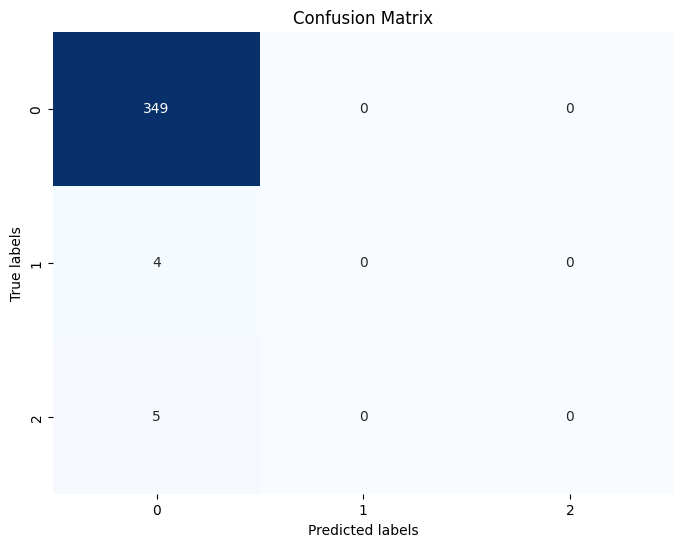

In [404]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [406]:
from sklearn.tree import DecisionTreeClassifier

In [407]:
dt_classifier = DecisionTreeClassifier(max_depth=7, random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

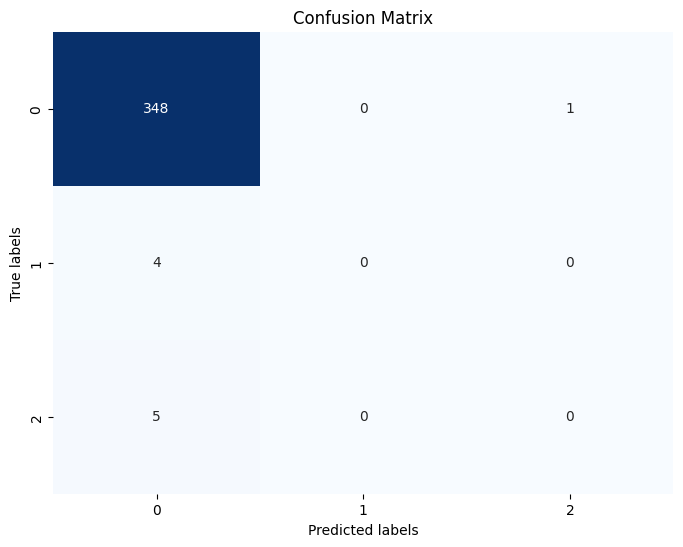

Accuracy: 0.9720670391061452


In [408]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)